# Coastal Endurance Washington Shelf 
## Surface Mooring Surface Buoy pCO2 air-sea
### Atmospheric CO2 concentrations
*First test using Python to get CO2 data from the OOI website , Rob Rhew, 7/24/19*

https://ooinet.oceanobservatories.org/data_access/?search=pCO2A

Download the data to your own account, get the emailed link, go to that link, search the catalog for what appears to be the most relevant dataset, OpenDAP. 


## Introduction
In this Python notebook, we will first load the necessary python libraries, define the website where you can get this data, then get atmospheric CO2 data from the Coastal Endurance Washington - SHELF location. 

In [1]:
import xarray as xr
!pip install netcdf4==1.5.0
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import os
import re
sns.set()

     |████████████████████████████████| 3.9MB 5.1MB/s 
     |████████████████████████████████| 307kB 41.7MB/s 


In [0]:
# This was the first single file that was tested, Deployment 8, 2018_0918 to 2019_0424
single_file = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0008_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20180918T175937.912000-20190424T145326.477000.nc'

# This is the URL received by email linking to the catalog of ALL of the deployments for this particular site.  
url_WashingtonShelf_CO2 = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/catalog.html'


In [0]:
# This came from Sage's github: a function that combines multiple datasets
# https://github.com/ooi-data-lab/data-lab-workshops/blob/master/June2019/Activities/DL_June_Air_Sea_v1.ipynb

import pprint as pp
def get_data(url,bad_inst=''):
  '''Function to grab all data from specified directory'''
  tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
  datasets = requests.get(url).text
  urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
  x = re.findall(r'(ooi/.*?.nc)', datasets)
  for i in x:
    if i.endswith('.nc') == False:
      x.remove(i)
  for i in x:
    try:
      float(i[-4])
    except:
      x.remove(i)
  datasets = [os.path.join(tds_url, i) for i in x]
  
  # Remove extraneous files if necessary
  selected_datasets = []
  for d in datasets:
    if (bad_inst) and bad_inst in d:
      pass
    elif 'ENG000' in d:     #Remove engineering streams for gliders -- not relevant for this site, but relevant for others
      pass
    elif 'water_recovered' in d:  #Remove water files, as data are in the air_recovered files
      pass
    elif 'METBK' in d:     #Remove files that have MET in the name
      pass
    else:
      selected_datasets.append(d)
  
 #  selected_datasets = selected_datasets[0:5]
  pp.pprint(selected_datasets)
  
  # Load in dataset
  ds = xr.open_mfdataset(selected_datasets)
  ds = ds.swap_dims({'obs': 'time'}) # Swap the primary dimension
  # ds = ds.chunk({'time': 100}) # Used for optimization
  ds = ds.sortby('time') # Data from different deployments can overlap so we want to sort all data by time stamp.
  return ds

In [4]:
# Now get the list of datasets using the function 'data_co2'
data_co2 = get_data(url_WashingtonShelf_CO2,'VELPT')

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0008_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20180918T175937.912000-20190424T145326.477000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0007_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20180325T195911.162000-20180807T225553.854000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0006_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20180108T005317.564000-20180116T175245.927000.nc',
 'https://opendap.oceanobser

InvalidIndexError: ignored

In [0]:
# SELECT THE DATASETS YOU WANT.  Warning: The next attempt to load multiple ones of these datasets doesn't work for some reason
selected_datasets= ['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0008_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20180918T175937.912000-20190424T145326.477000.nc',
   'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0007_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20180325T195911.162000-20180807T225553.854000.nc']
#  'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0006_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20180108T005317.564000-20180116T175245.927000.nc',
#   'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0006_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20171211T005500.159000-20180107T235337.293000.nc',
#  'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0006_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20171113T005643.122000-20171210T235519.887000.nc',
#  'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0006_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20171016T005825.417000-20171112T235703.551000.nc',
#  'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0006_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20171003T165911.323000-20171015T235845.846000.nc',
#   'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0004_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20161212T000820.960000-20161224T160933.259000.nc',
#  'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0004_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20161114T000543.155000-20161211T230821.074000.nc',
#  'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0004_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20161017T000305.637000-20161113T230543.271000.nc',
#  'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0004_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20160921T000039.382000-20161016T230305.752000.nc',
#  'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0003_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20160505T195929.790000-20160927T185612.883000.nc',
#  'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0002_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20151013T175903.081000-20160513T214601.060000.nc',
#  'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rrhew@berkeley.edu/20190725T000527981Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0001_CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20150415T180001.379000-20150923T145401.731000.nc']

In [7]:
# Load in multiple datasets - here we only picked a couple from above.  keep trying till it don't work. 
ds = xr.open_mfdataset(selected_datasets,compat='no_conflicts')
ds = ds.swap_dims({'obs': 'time'}) # Swap the primary dimension
# ds = ds.chunk({'time': 100}) # Used for optimization
ds = ds.sortby('time') # Data from different deployments can overlap so we want to sort all data by time stamp.
df = ds.to_dataframe() #And convert to a Pandas DataFrame 
print('Dataset has %d points' % df.index.size)


Dataset has 72450 points


In [0]:
# If you want, you can load a single data file instead, using "single_file"
ds = xr.open_dataset(single_file)
ds = ds.swap_dims({'obs': 'time'}) #Swap dimensions
df = ds.to_dataframe() #And convert to a Pandas DataFrame
print('Dataset has %d points' % df.index.size)

Dataset has 46485 points


In [0]:
ds['met_relwind_speed'].comment

<xarray.DataArray 'met_relwind_speed' (time: 72450)>
dask.array<shape=(72450,), dtype=float64, chunksize=(25965,)>
Coordinates:
    obs      (time) int64 0 1 2 3 4 5 6 ... 46479 46480 46481 46482 46483 46484
  * time     (time) datetime64[ns] 2018-03-25T19:59:11.161999872 ... 2019-04-24T14:53:26.477000192
    lat      (time) float64 dask.array<shape=(72450,), chunksize=(25965,)>
    lon      (time) float64 dask.array<shape=(72450,), chunksize=(25965,)>
Attributes:
    comment:                  RELWIND_SPD-AUX, the magnitude of the vector di...
    data_product_identifier:  RELWIND_SPD-AUX
    long_name:                Relative Wind Speed
    units:                    m s-1
    precision:                4
    instrument:               CE07SHSM-SBD11-06-METBKA000
    stream:                   metbk_a_dcl_instrument_recovered
    _ChunkSizes:              10000

In [0]:
ds['met_relwind_speed']

<xarray.DataArray 'met_relwind_speed' (time: 196245)>
dask.array<shape=(196245,), dtype=float64, chunksize=(34758,)>
Coordinates:
    obs      (time) int64 0 1 2 3 4 5 6 ... 46479 46480 46481 46482 46483 46484
  * time     (time) datetime64[ns] 2015-04-15T18:00:01.378999808 ... 2019-04-24T14:53:26.477000192
    lat      (time) float64 dask.array<shape=(196245,), chunksize=(34758,)>
    lon      (time) float64 dask.array<shape=(196245,), chunksize=(34758,)>
Attributes:
    comment:                  RELWIND_SPD-AUX, the magnitude of the vector di...
    data_product_identifier:  RELWIND_SPD-AUX
    long_name:                Relative Wind Speed
    units:                    m s-1
    precision:                4
    instrument:               CE07SHSM-SBD11-06-METBKA000
    stream:                   metbk_a_dcl_instrument_recovered

In [0]:
# Display the first few rows of the dataframe, to get the header names!
df.head()

,obs,deployment,id,avg_irga_temperature,current_a2d,date_time_string,dcl_controller_timestamp,driver_timestamp,gas_stream_pressure,humidity,humidity_temperature,ingestion_timestamp,internal_timestamp,irga_detector_temperature,irga_source_temperature,measured_air_co2,port_timestamp,preferred_timestamp,zero_a2d,partial_pressure_co2_atm,partial_pressure_co2_ssw,met_salsurf,sea_surface_temperature,met_wind10m,pco2_co2flux,northward_velocity,eastward_velocity,longwave_irradiance,air_temperature,relative_humidity,shortwave_irradiance,precipitation,barometric_pressure,met_relwind_speed,measured_air_co2_qc_executed,measured_air_co2_qc_results,partial_pressure_co2_atm_qc_executed,partial_pressure_co2_atm_qc_results,pco2_co2flux_qc_executed,pco2_co2flux_qc_results,lat,lon,new_partial_pressure_co2_atm
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-03-25 19:59:11.161999872,0,7,b'daa57bd1-4d38-4098-9dec-4ffe0c9597fe',39.900002,41485.0,b'empty',b'empty',2018-12-03 18:23:57.105893376,1023.0,10.281,16.080000,2018-12-03 18:42:32.894000128,2018-03-25 19:53:36,39.5,40.400002,423.429993,2018-03-25 19:59:11.161999872,b'port_timestamp',44525.0,427.504441,231.831873,24.174084,9.066575,NaN,NaN,0.558228,0.196569,295.923386,8.370276,63.126587,648.111315,23.350215,1019.909973,4.312587,21.0,21.0,29.0,29.0,29.0,28.0,46.98812,-124.568,327.504441
2018-03-25 19:59:11.203999744,1,7,b'd72e92fd-26a3-4e04-b75f-025853d55f77',39.900002,41483.0,b'empty',b'empty',2018-12-03 18:23:57.105999872,1023.0,10.281,16.080000,2018-12-03 18:42:32.894000128,2018-03-25 19:53:38,39.5,40.299999,423.450012,2018-03-25 19:59:11.203999744,b'port_timestamp',44525.0,427.524673,231.831718,24.174081,9.066592,NaN,NaN,0.558227,0.196570,295.923018,8.370253,63.124181,648.125309,23.350264,1019.909973,4.312421,21.0,21.0,29.0,29.0,29.0,28.0,46.98812,-124.568,327.524673
2018-03-25 19:59:11.246000128,2,7,b'c0539842-92c5-4ff5-a6f6-42b0effd00cb',39.900002,41484.0,b'empty',b'empty',2018-12-03 18:23:57.106082816,1023.0,10.281,16.080000,2018-12-03 18:42:32.895000064,2018-03-25 19:53:40,39.5,40.400002,423.450012,2018-03-25 19:59:11.246000128,b'port_timestamp',44525.0,427.524673,231.831564,24.174079,9.066609,NaN,NaN,0.558225,0.196571,295.922649,8.370230,63.121776,648.139302,23.350313,1019.909973,4.312254,21.0,21.0,29.0,29.0,29.0,28.0,46.98812,-124.568,327.524673
2018-03-25 19:59:11.288000000,3,7,b'7b154e24-b698-4e02-9712-cd9e2cc6e3cf',39.900002,41485.0,b'empty',b'empty',2018-12-03 18:23:57.106220032,1023.0,10.308,16.120001,2018-12-03 18:42:32.896000000,2018-03-25 19:53:41,39.5,40.400002,423.399994,2018-03-25 19:59:11.288000000,b'port_timestamp',44525.0,427.474155,231.831409,24.174076,9.066627,NaN,NaN,0.558223,0.196571,295.922281,8.370207,63.119371,648.153296,23.350363,1019.909973,4.312088,21.0,21.0,29.0,29.0,29.0,28.0,46.98812,-124.568,327.474155
2018-03-25 19:59:11.329999872,4,7,b'f03110b7-8e28-47b3-88be-5ceb278b135e',40.000000,41484.0,b'empty',b'empty',2018-12-03 18:23:57.106344960,1023.0,10.336,16.160000,2018-12-03 18:42:32.896000000,2018-03-25 19:53:43,39.5,40.400002,423.399994,2018-03-25 19:59:11.329999872,b'port_timestamp',44525.0,427.474155,231.831255,24.174074,9.066644,NaN,NaN,0.558222,0.196572,295.921913,8.370185,63.116966,648.167289,23.350412,1019.909973,4.311922,21.0,21.0,29.0,29.0,29.0,28.0,46.98812,-124.568,327.474155


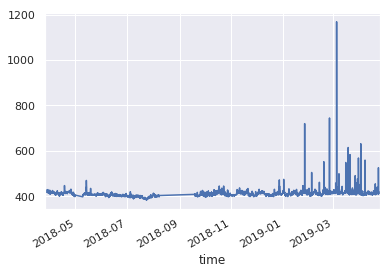

In [0]:
#  df.measured_air_co2.plot();   Not sure why this is slightly different from the partial pressure
df.partial_pressure_co2_atm.plot();  

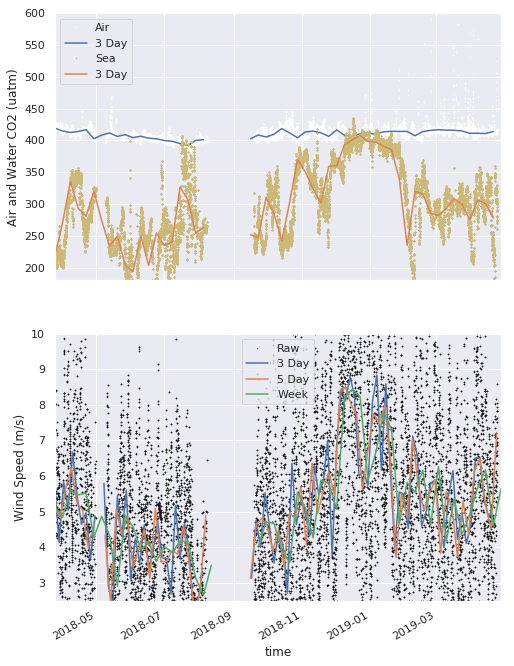

In [8]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize = (8,12))
# fig.set_size_inches(12, 6)
df['partial_pressure_co2_atm'].plot(ax=ax1,label='Air',linestyle='None',marker='.',markersize=1,color='w');
df['partial_pressure_co2_atm'].resample('7D').mean().plot(ax=ax1,label='3 Day')

df['partial_pressure_co2_ssw'].plot(ax=ax1,label='Sea',linestyle='None',marker='.',markersize=1,color='y')
df['partial_pressure_co2_ssw'].resample('7D').mean().plot(ax=ax1,label='3 Day')
ax1.set_ylim([180,600])
ax1.set_ylabel('Air and Water CO2 (uatm)')
ax1.legend();

df['met_relwind_speed'].plot(ax=ax2,label='Raw',linestyle='None',marker='.',markersize=0.5,color='k')
df['met_relwind_speed'].resample('4D').mean().plot(ax=ax2,label='3 Day')
df['met_relwind_speed'].resample('5D').mean().plot(ax=ax2,label='5 Day')
df['met_relwind_speed'].resample('W').mean().plot(ax=ax2,label='Week')

ax2.set_ylim([2.5,10])
ax2.set_ylabel('Wind Speed (m/s)')
plt.legend();


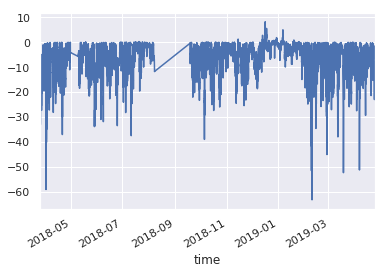

In [9]:
#   function [F_CO2, dpCO2]=FCO2(pCO2_agua, pCO2_atm,T,S,u)
#   pCO2_agua= seawater pCO2 (uatm)
#    %pCO2_atm=  atmospheric pCO2 (uatm)
#    %T=  Temperature (Celsius)
#    %S=  Salinity 
#    %u = Wind speed (m/s)   
#    %Air-sea CO2 is calculated as follows:
#    FCO2 =K*a(dpCO2) 
#     %Where
#     %K=is the transfer velocity according to Wanninkhof (1992).
#     %a = CO2 solibility constant according to Weiss (1974)
#     %dpCO2 is the difference of air and seawater pCO2 
    
    
#     %%%%% CO2 Transfer velocity calculation %%%%%%%%%
#  ******** Schmidt Number*********
# Compute Schmidt number (after Wanninkhof, 1992, Table A1)
#  For water of salinity=35 and temperature range 0-30C    %%%%%%%%%%%%%    
A = 2073.1;     
B = 125.62;     
C = 3.6276;     
D = 0.043219;
T = df['sea_surface_temperature']    
S = 34
# Schmidt= A - (B.*T)+(C.*T.^2)-(D.*T.^3) 
Schmidt= A - (B*T)+(C*T**2)-(D*T**3)    

u = df['met_relwind_speed']

# DOUBLE CHECK THESE CALCULATIONS:  THERE MAY BE A BIG MISTAKE WITH K!!!
#if u<=6;    
# Compute gas transfer velocity (after Sweeney et al. 2007, Fig. 3 and Table 1)
K = 0.27 * u**2 * np.sqrt(660.0 / Schmidt)

#  K=0.31*(u**2)*((Schmidt/660)**-0.5); # for slower steadier wind
 
    
#   else    
#  K=0.39*(u.^2).*((Schmidt./660).^-0.5);
#  end
# calculation of delta pCO2

# df['new_partial_pressure_co2_atm']= df['partial_pressure_co2_atm']-100
dpCO2=df['partial_pressure_co2_ssw'] - df['partial_pressure_co2_atm'];  

AA=[-60.2409, 93.4517, 23.3585];  # mol/Kg.atm
BB=[0.023517, -0.023656, 0.0047036]; # mol/Kg.atm
T=T+273.15; #  Conversio from Celsius degrees to Kelvins
#T=T+293.15; #  Conversio from Celsius degrees to Kelvins
# Ln_Ko=AA(1)+(AA(2).*(100./T))+(AA(3).*log(T./100))+S.*(BB(1)+(BB(2).*(T./100))+(BB(3).*(T./100).^2));
Ln_Ko=AA[0]+(AA[1]*(100/T))+(AA[2]*np.log(T/100))+S*(BB[0]+(BB[1]*(T/100))+(BB[2]*(T/100)**2));
Ko=np.exp(Ln_Ko)
a=Ko     #  Solibility in mmol L^-1 atm^-1 or mmol m^-3 uatm^-1    
F_CO2 =0.24*K*a*dpCO2; #  CO2 flux (mmol m^-2 d^-1)
F_CO2 =0.24*K*a*dpCO2; #  CO2 flux (mmol m^-2 d^-1)
F_CO2.head()
F_CO2.plot();

In [10]:
F_CO2.index


DatetimeIndex(['2018-03-25 19:59:11.161999872',
               '2018-03-25 19:59:11.203999744',
               '2018-03-25 19:59:11.246000128',
                  '2018-03-25 19:59:11.288000',
               '2018-03-25 19:59:11.329999872',
               '2018-03-25 19:59:11.371999744',
               '2018-03-25 19:59:11.415000064',
               '2018-03-25 19:59:11.456999936',
               '2018-03-25 19:59:11.499000320',
                  '2018-03-25 20:59:11.072000',
               ...
               '2019-04-24 13:53:26.552999936',
               '2019-04-24 14:53:26.140000256',
               '2019-04-24 14:53:26.182000128',
                  '2019-04-24 14:53:26.224000',
               '2019-04-24 14:53:26.265999872',
               '2019-04-24 14:53:26.308000256',
               '2019-04-24 14:53:26.350000128',
               '2019-04-24 14:53:26.392999424',
               '2019-04-24 14:53:26.434999808',
               '2019-04-24 14:53:26.477000192'],
              dtype=

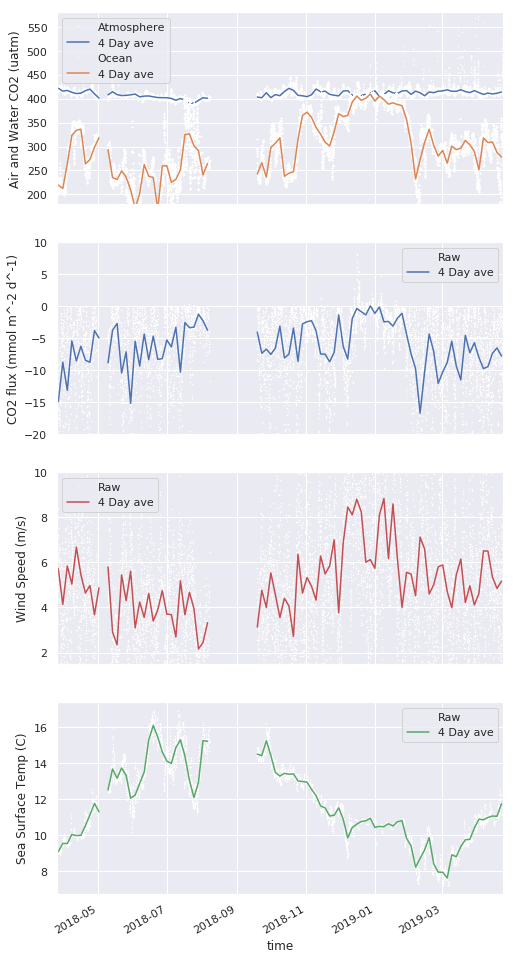

In [11]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, sharex=True, figsize = (8,18))
# fig.set_size_inches(12, 6)
avgdays = 4       # WHAT'S YOUR AVERAGING WINDOW?
halfavg = avgdays/2

# FIGURE 1 = CO2 in ATMOSPHERE AND OCEANS
df['partial_pressure_co2_atm'].plot(ax=ax1,label='Atmosphere',linestyle='None',marker='.',markersize=1,color='w');
#df['partial_pressure_co2_atm'].resample('4D').mean().plot(ax=ax1,label='4 Day')
dfa = df['partial_pressure_co2_atm'].tshift(2,freq='D')   #  shift ahead by 2 days
dfa.resample('4D').mean().plot(ax=ax1,label='4 Day ave')

df['partial_pressure_co2_ssw'].plot(ax=ax1,label='Ocean',linestyle='None',marker='.',markersize=1,color='w')
#df['partial_pressure_co2_ssw'].resample('4D').mean().plot(ax=ax1,label='4 Day')
dfw = df['partial_pressure_co2_ssw'].tshift(2,freq='D')   #  shift ahead by 2 days
dfw.resample('4D').mean().plot(ax=ax1,label='4 Day ave')
dfw.tail()
ax1.set_ylim([180,580])
ax1.set_ylabel('Air and Water CO2 (uatm)')
ax1.legend();

# FIGURE 2 = CO2 FLUX
F_CO2.plot(ax=ax2,label='Raw',linestyle='None',marker='.',markersize=0.5,color='w')
#F_CO2.resample('4D').mean().plot(ax=ax2,label='4 Day')
shiftedco2 = F_CO2.tshift(2,freq='D')   #  shift ahead by 2 days
shiftedco2.resample('4D').mean().plot(ax=ax2,label='4 Day ave')
ax2.set_ylim([-20,10])
ax2.set_ylabel('CO2 flux (mmol m^-2 d^-1)')
ax2.legend();

# FIGURE 3 = WIND SPEED
df['met_relwind_speed'].plot(ax=ax3,label='Raw',linestyle='None',marker='.',markersize=0.5,color='w')
#df['met_relwind_speed'].resample('4D').mean().plot(ax=ax3,label='4 Day')
dfwind = df['met_relwind_speed'].tshift(2,freq='D')   #  shift ahead by 2 days
dfwind.resample('4D').mean().plot(ax=ax3,label='4 Day ave',color='r')
ax3.set_ylabel('Wind Speed (m/s)')
ax3.legend();
ax3.set_ylim([1.5,10])

# FIGURE 4 = SEA SURFACE TEMP
df['sea_surface_temperature'].plot(ax=ax4,label='Raw',linestyle='None',marker='.',markersize=0.5,color='w')
#df['sea_surface_temperature'].resample('4D').mean().plot(ax=ax4,label='4 Day')
dfsst = df['sea_surface_temperature'].tshift(2,freq='D')   #  shift ahead by 2 days
dfsst.resample('4D').mean().plot(ax=ax4,label='4 Day ave',color='g')
ax4.set_ylabel('Sea Surface Temp (C)')
ax4.legend();
# ax4.set_ylim([1.5,12])
# plt.title('Washington Shelf');
plt.savefig('savedfigure.png')